In [34]:
# importing the necessary libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [35]:
#Loading the dataset
df = pd.read_csv('IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [37]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [39]:
#Display no of samples on each class
x=df.value_counts()
x

sepal_length  sepal_width  petal_length  petal_width  species        
4.9           3.1          1.5           0.1          Iris-setosa        3
5.8           2.7          5.1           1.9          Iris-virginica     2
              4.0          1.2           0.2          Iris-setosa        1
5.9           3.0          4.2           1.5          Iris-versicolor    1
6.2           3.4          5.4           2.3          Iris-virginica     1
                                                                        ..
5.5           2.3          4.0           1.3          Iris-versicolor    1
              2.4          3.7           1.0          Iris-versicolor    1
                           3.8           1.1          Iris-versicolor    1
              2.5          4.0           1.3          Iris-versicolor    1
7.9           3.8          6.4           2.0          Iris-virginica     1
Name: count, Length: 147, dtype: int64

In [40]:
#checking null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

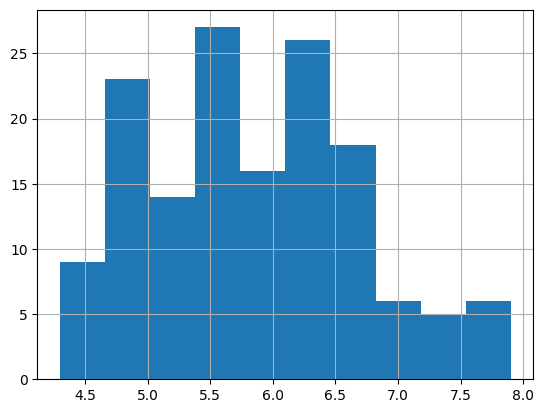

In [41]:
x=df['sepal_length'].hist()
x

<Axes: >

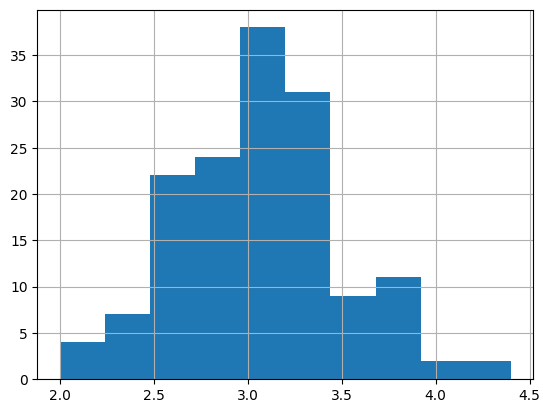

In [42]:
df['sepal_width'].hist()

<Axes: >

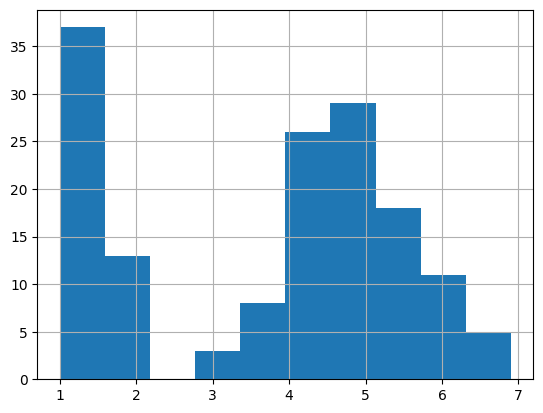

In [43]:
df['petal_length'].hist()

<Axes: >

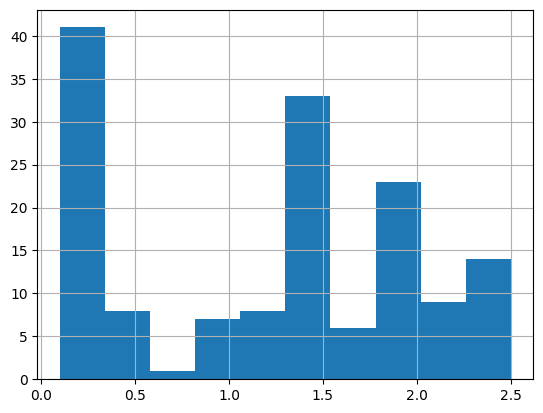

In [44]:
df['petal_width'].hist()

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

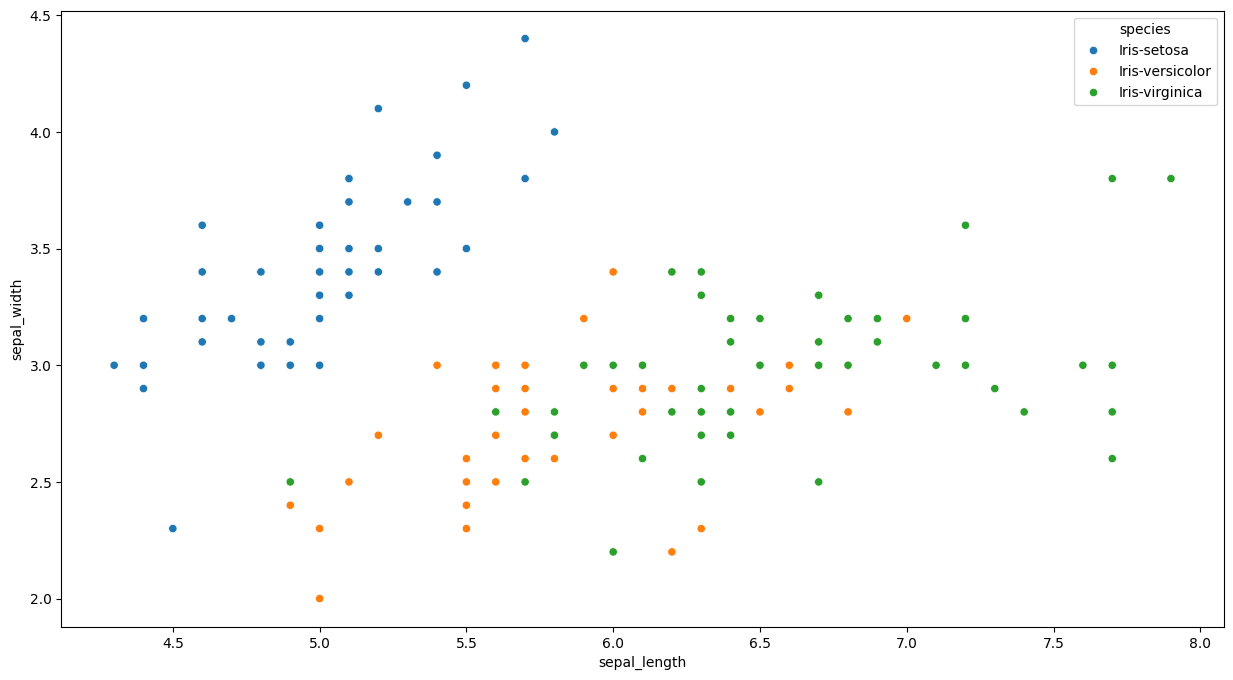

In [45]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="sepal_length", y="sepal_width", data=df ,hue="species")

<Axes: xlabel='petal_length', ylabel='petal_width'>

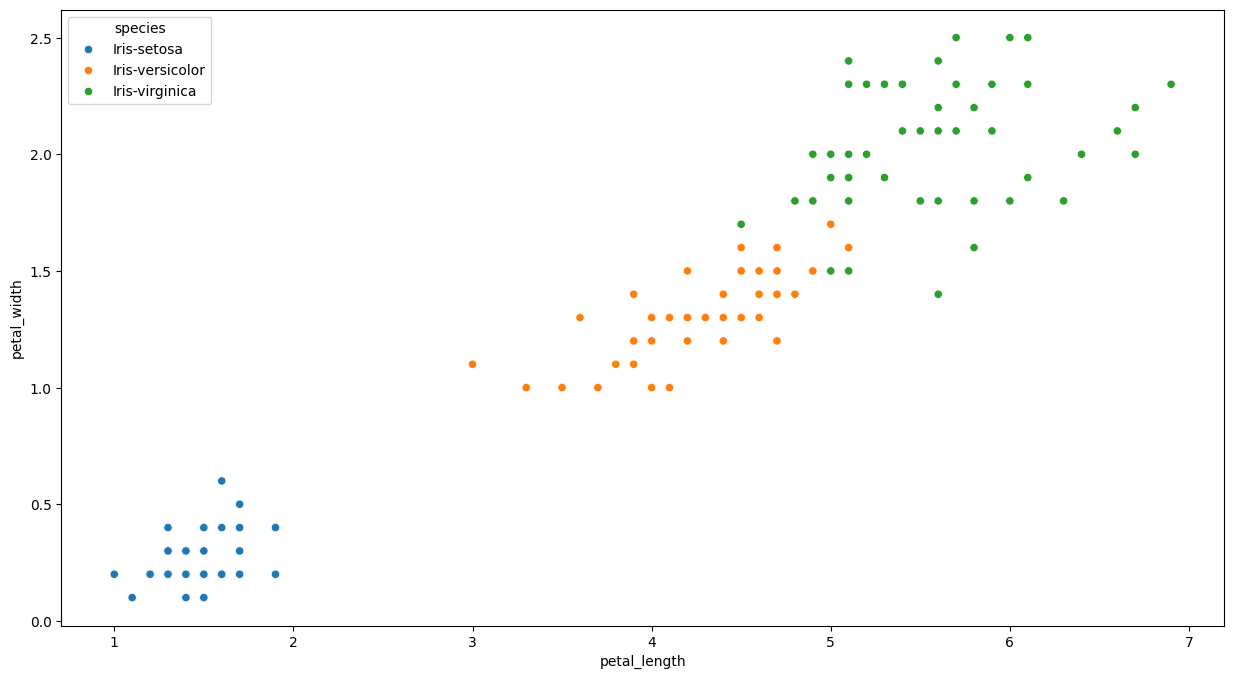

In [46]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="petal_length", y="petal_width", data=df ,hue="species")

<Axes: xlabel='sepal_length', ylabel='petal_length'>

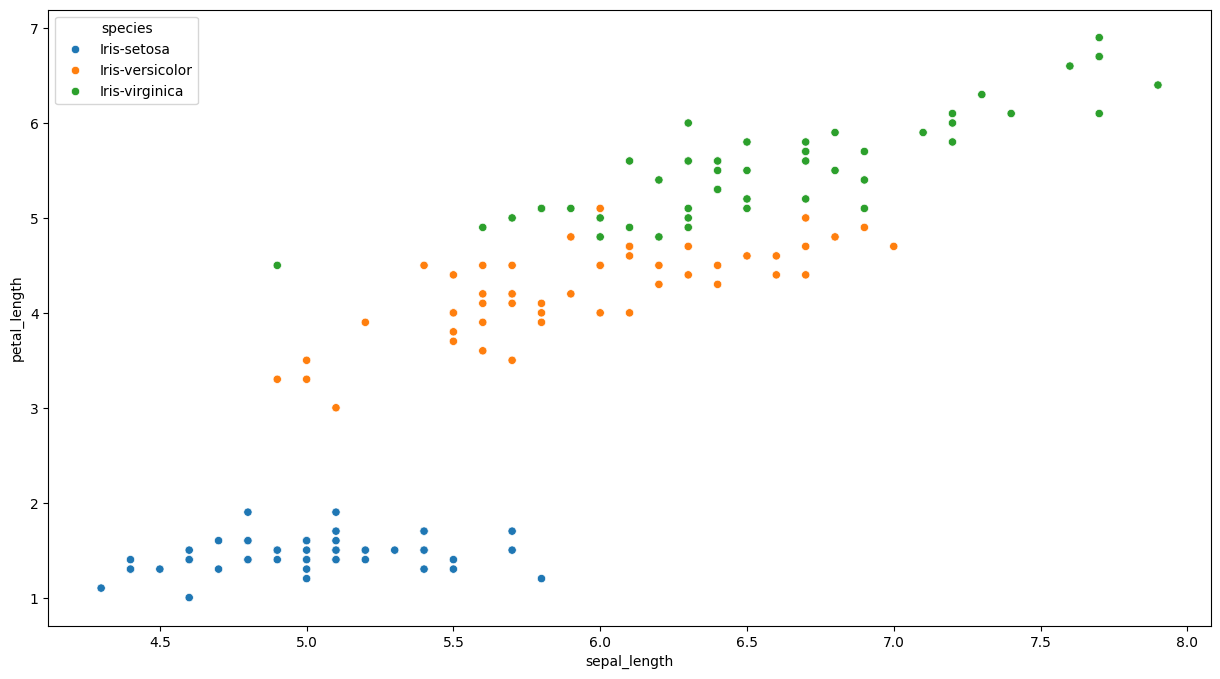

In [47]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="sepal_length", y="petal_length", data=df ,hue="species")

<Axes: xlabel='sepal_width', ylabel='petal_width'>

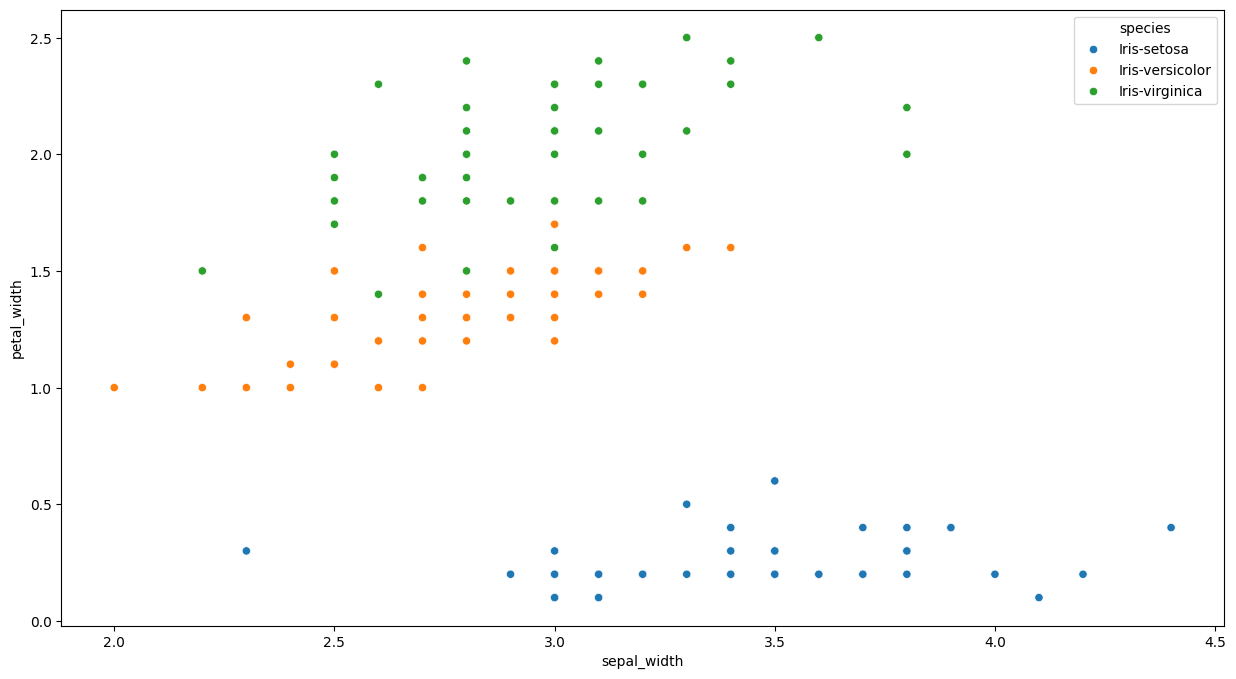

In [48]:
plt.figure(figsize = (15,8))
sns.scatterplot(y="petal_width", x="sepal_width", data=df ,hue="species")

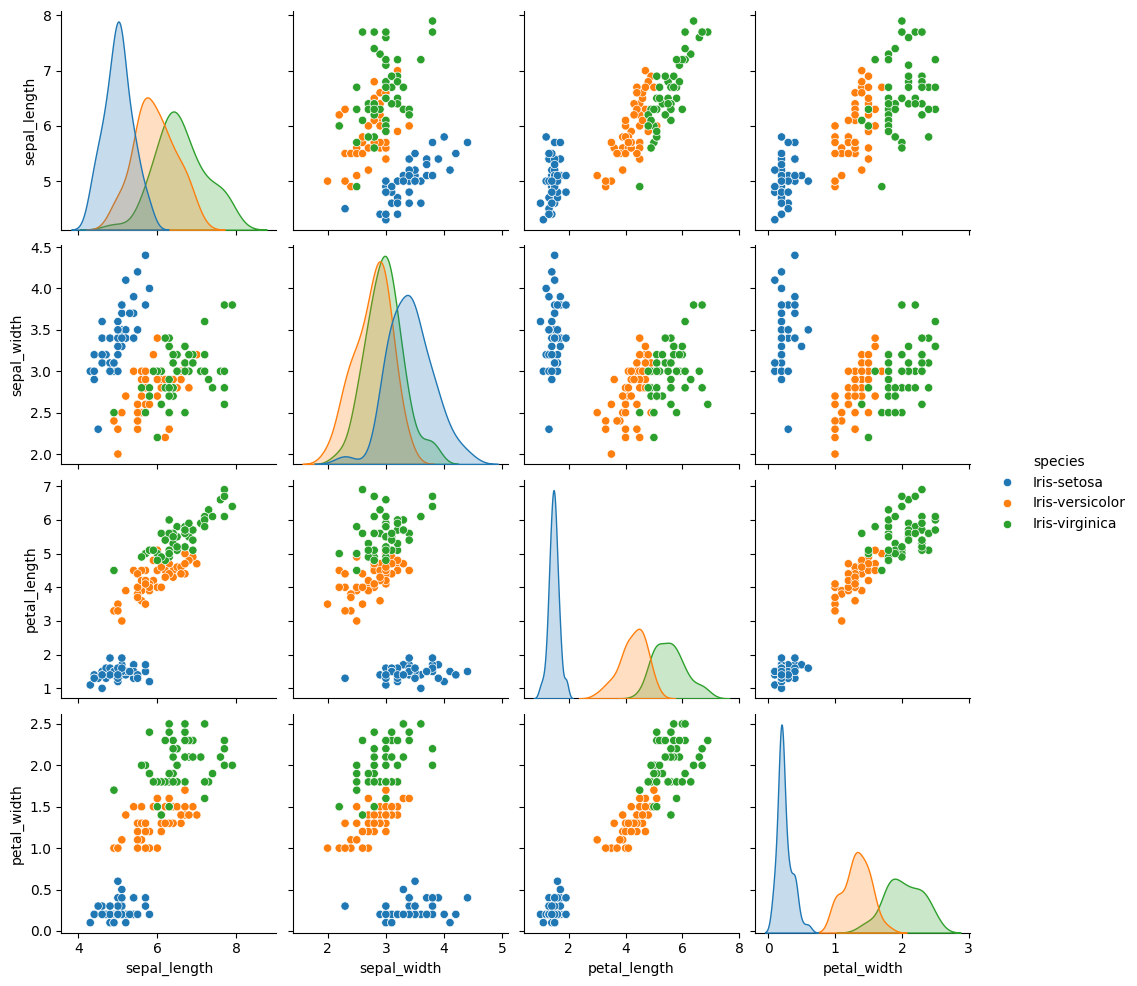

In [49]:
sns.pairplot(data=df,hue="species")

In [50]:
#display correlation matrix
corr=df.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


Text(0.5, 1.0, 'Correlation Heatmap of Iris Dataset')

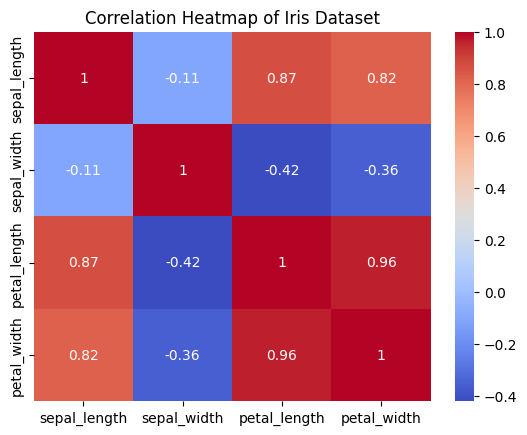

In [51]:
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap of Iris Dataset")

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
x = df.drop(columns=['species'])
y = df['species']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


In [54]:
#Logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)
print("Logistic Regression Accuracy = ",model.score(x_test,y_test)*100)

Logistic Regression Accuracy =  97.77777777777777


In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
q=model.predict(x_test)
print(classification_report(q,y_test))
print("Logistic Regression Accuracy = ",accuracy_score(q,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Logistic Regression Accuracy =  0.9777777777777777


In [56]:
print("Confusion matrix for Logistic Rgression:\n",confusion_matrix(q,y_test))

Confusion matrix for Logistic Rgression:
 [[14  0  0]
 [ 0 14  1]
 [ 0  0 16]]


In [57]:
new_data=pd.DataFrame({"sepal_length":[7],"sepal_width":[3.2],"petal_length":[4.7],"petal_width":[1.2]})
prediction = model.predict(new_data)
print("The output we got for Logistic Regression is :")
prediction[0]

The output we got for Logistic Regression is :


'Iris-versicolor'

In [58]:
#KNN Neighbour classifier
model=KNeighborsClassifier()
model.fit(x_train,y_train)
print("KNeighborsClassifier Accuracy = ",model.score(x_test,y_test)*100)

KNeighborsClassifier Accuracy =  97.77777777777777


In [59]:
q=model.predict(x_test)
print(classification_report(q,y_test))
print("KNeighborsClassifier Accuracy = ",accuracy_score(q,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        16

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

KNeighborsClassifier Accuracy =  0.9777777777777777


In [60]:
print("Confusion matrix for KNeighborsClassifier :\n",confusion_matrix(q,y_test))

Confusion matrix for KNeighborsClassifier :
 [[14  0  0]
 [ 0 14  1]
 [ 0  0 16]]


In [61]:
new_data=pd.DataFrame({"sepal_length":[4.1],"sepal_width":3.0,"petal_length":0.4,"petal_width":0.2})
prediction = model.predict(new_data)
print("The output we got for KNeighborsClassifier is :")
prediction[0]

The output we got for KNeighborsClassifier is :


'Iris-setosa'

In [62]:
#DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
print("DecisionTreeClassifier Accuracy = ",model.score(x_test,y_test)*100)

DecisionTreeClassifier Accuracy =  95.55555555555556


In [63]:
q=model.predict(x_test)
print(classification_report(q,y_test))
print("DecisionTreeClassifier Accuracy = ",accuracy_score(q,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.93        16
 Iris-virginica       0.88      1.00      0.94        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45

DecisionTreeClassifier Accuracy =  0.9555555555555556


In [64]:
print("Confusion matrix for DecisionClassifier :\n",confusion_matrix(q,y_test))

Confusion matrix for DecisionClassifier :
 [[14  0  0]
 [ 0 14  2]
 [ 0  0 15]]


In [65]:
new_data=pd.DataFrame({"sepal_length":[4.1],"sepal_width":3.0,"petal_length":0.4,"petal_width":0.2})
prediction = model.predict(new_data)
print("The output we got for DecisionClassifier is :")
prediction[0]

The output we got for DecisionClassifier is :


'Iris-setosa'

In [67]:
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width
39,5.1,3.4,1.5,0.2
128,6.4,2.8,5.6,2.1
97,6.2,2.9,4.3,1.3
125,7.2,3.2,6.0,1.8
25,5.0,3.0,1.6,0.2
